# Make a model

I denne notebooken vil jeg hente data og lage en model. Notebooken gjør følgende:
<ul>
<li>Rense data
<li>Henter ut indikatorerer med stockstats
<li>Beregner mean og stdv (z = t(0.95, df=len(antall_gode_oppganger))
<li>Lagrer modellen


In [135]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import matplotlib.pyplot as plt
import plotly.express as px
import stockstats
import sys
import os
import statistics
from scipy.stats import t

from lib.rens import rens
from lib.god_runde import positiv_utvikling

In [4]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds']
    for ind in indikatorer:
        stock.get(ind)

    all_indikator = {ind:[] for ind in indikatorer}

    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]     
        for ind in all_indikator:
            all_indikator[ind].append(oppgang[ind].values)
    
    return all_indikator

def multi_analyse(filer):
    alle_gode = pd.DataFrame(columns=['navn'])

    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} analysert" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        gode = pos_ut.calculate(data)
        alle_indikatorer = hent_indikatortall(data, gode)
        for ind in alle_indikatorer:
            gode[ind] = alle_indikatorer[ind]
            
        gode['navn'] = fil.split('/')[1].split('.xl')[0]
        alle_gode = alle_gode.append(gode, ignore_index=True)
               
    return alle_gode


def add_data(word):
    ordet = 'data/' + word
    return ordet

In [5]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [169]:
filer = list(map(add_data, os.listdir('data/')))[:60]
data = multi_analyse(filer)
data['sma8-16'] = [data.open_8_sma[i] - data.open_16_sma[i] for i, value in enumerate(data.open_8_sma)]
data

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


,navn,start,endex,start_pris,slutt_pris,oppgang,score,rsi_20,trix,open_8_sma,open_16_sma,macds,sma8-16
0,Aker 02.04.2020,128.0,186.0,240.20,247.80,3.164030,50.703007,"[33.81243254968905, 33.81243254968905, 38.6569...","[-0.04397465516493707, -0.045443866319610726, ...","[241.0750000000002, 240.9750000000002, 240.950...","[241.77500000000003, 241.6125, 241.47500000000...","[-0.7287504097325816, -0.7451481517388542, -0....","[-0.6999999999998465, -0.6374999999998181, -0...."
1,Aker 02.04.2020,229.0,267.0,245.80,249.60,1.545972,31.951273,"[50.71615637249463, 47.90096406491234, 47.9009...","[-0.010354636272359287, -0.009138505674278392,...","[245.27500000000046, 245.32500000000044, 245.3...","[245.4375000000002, 245.4750000000002, 245.512...","[-0.21239923294784613, -0.19739665579452376, -...","[-0.16249999999973852, -0.1499999999997499, -0..."
2,Aker 30.04.2020,58.0,106.0,267.80,272.60,1.792382,36.304068,"[39.67111865884208, 39.17672236892631, 38.6694...","[-0.10058224660774777, -0.0966240136151853, -0...","[267.25, 267.09999999999997, 267.0999999999999...","[268.4249999999998, 268.3499999999998, 268.249...","[-1.7621945819520486, -1.7223674741857025, -1....","[-1.174999999999784, -1.2499999999998295, -1.1..."
3,Aker 30.04.2020,118.0,159.0,270.40,273.60,1.183432,30.083060,"[48.123898874117444, 49.52600847498533, 53.495...","[-0.004073298420161102, -0.006143478019842823,...","[270.22499999999985, 270.29999999999984, 270.4...","[271.12499999999983, 271.03749999999985, 270.9...","[0.061652168278914544, 0.02892586375705228, 0....","[-0.8999999999999773, -0.7375000000000114, -0...."
4,Aker 31.03.2020,41.0,70.0,227.80,235.00,3.160667,29.493962,"[47.55734379453681, 49.10491214742308, 47.6255...","[-0.04210342809995147, -0.04285742782661868, -...","[227.49999999999997, 227.47499999999997, 227.3...","[228.41250000000005, 228.35000000000005, 228.3...","[-0.45564843789836923, -0.47301410008353206, -...","[-0.9125000000000796, -0.8750000000000853, -0...."
5,Aker 31.03.2020,112.0,142.0,232.80,235.00,0.945017,24.096609,"[47.36172689163056, 43.825070640844395, 50.617...","[-0.04267460755521606, -0.04193714503093347, -...","[232.34999999999997, 232.37499999999997, 232.5...","[232.82500000000005, 232.70000000000005, 232.7...","[-0.4568032144150203, -0.46607928971840773, -0...","[-0.4750000000000796, -0.3250000000000739, -0...."
6,Aker 31.03.2020,279.0,313.0,229.00,233.40,1.921397,27.159496,"[39.788251937614454, 42.89453467747394, 42.894...","[-0.0495834858690581, -0.047488407764097115, -...","[228.87499999999986, 228.87499999999983, 228.8...","[229.31250000000003, 229.30000000000004, 229.3...","[-0.7542320347922611, -0.7363138158583081, -0....","[-0.43750000000017053, -0.4250000000002103, -0..."
7,Aker BP 20.08.2020,163.0,207.0,175.15,176.75,0.913503,28.551216,"[52.614410878664444, 50.49169578004401, 50.491...","[0.0038925265723230265, 0.0032561865549406246,...","[175.125, 175.10625, 175.10625, 175.10625, 175...","[175.15937499999998, 175.15624999999997, 175.1...","[0.04339675217064662, 0.03901491654944172, 0.0...","[-0.03437499999998295, -0.04999999999998295, -..."
8,Aker BP 27.04.2020,21.0,61.0,154.00,155.45,0.941558,27.912907,"[51.13648908828135, 46.53724332213418, 44.7711...","[-0.014545718565755279, -0.014296135121243381,...","[153.5, 153.53125, 153.4625, 153.4874999999999...","[153.7, 153.63125, 153.58125, 153.540625, 153....","[-0.07021064141847043, -0.07129453438168222, -...","[-0.19999999999998863, -0.09999999999999432, -..."
9,Aker BP 29.04.2020,36.0,78.0,159.45,164.15,2.947632,34.597741,"[43.71824202124468, 48.78749808747356, 49.6553...","[-0.026287386371428013, -0.027061119126633993,...","[159.74375, 159.73125000000002, 159.68125, 159...","[160.00312499999993, 160.00312499999993, 159.9...","[-0.18963377788574767, -0.1990575001083057, -0...","[-0.2593749999999204, -0.27187499999990905, -0..."


In [170]:
data_oppgang = data[data.oppgang > 0.9]
data_oppgang = data_oppgang[data_oppgang.score > 30]
data_oppgang = data_oppgang.reset_index(drop=True)

In [171]:
indikatorer = [colm for colm in data_oppgang.columns[7:]]
statestikk_df = pd.DataFrame(columns=indikatorer, index=['mean', 'stdv', 'upper', 'lower'])
for ind in indikatorer: # skal hente ut snittet pr for hver

    means = []
    stdv = []
    longest = max(data_oppgang[ind], key=len)
    for i in range(len(longest)):
        samlet_verdier = [data_oppgang[ind][j][i]for j in range(len(data_oppgang[ind])) if len(data_oppgang[ind][j]) > i]
        means.append(statistics.mean(samlet_verdier))
        stdv.append(statistics.stdev(samlet_verdier)) if len(samlet_verdier)>1 else stdv.append(0)
  
    z = t.ppf(0.95, df=len(data_oppgang[ind])-1)
    statestikk_df[ind]['mean'] = means
    statestikk_df[ind]['stdv'] = stdv
    statestikk_df[ind]['upper'] = [statestikk_df[ind]['mean'][i] + statestikk_df[ind]['stdv'][i]*z
                                    for i in range(len(statestikk_df[ind]['mean']))]
    statestikk_df[ind]['lower'] = [statestikk_df[ind]['mean'][i] - statestikk_df[ind]['stdv'][i]*z
                                    for i in range(len(statestikk_df[ind]['mean']))]

statestikk_df

,rsi_20,trix,open_8_sma,open_16_sma,macds,sma8-16
mean,"[44.84911826514871, 46.20231572815453, 46.5756...","[-0.02800572575055754, -0.028065292214371935, ...","[172.052275, 172.038725, 172.03762500000002, 1...","[172.35323750000003, 172.33004134615388, 172.2...","[-0.2138670843263274, -0.21778962222552356, -0...","[-0.30096250000001956, -0.2913163461538707, -0..."
stdv,"[6.456074621342354, 6.720070841550663, 5.48663...","[0.03802853071680486, 0.03735054314875484, 0.0...","[101.60294683471247, 101.59916402677787, 101.5...","[101.65917480129347, 101.68573317545805, 101.6...","[0.40653399126368905, 0.3978418711803259, 0.38...","[0.33803807801409586, 0.31779434239723375, 0.2..."
upper,"[55.89470064136139, 57.69956450668543, 55.9626...","[0.037056605978109114, 0.03583708273371657, 0....","[345.88293600549986, 345.86291406719283, 345.8...","[346.2800979259131, 346.30234001849664, 346.28...","[0.48166463620077393, 0.46287090581453094, 0.4...","[0.2773807900013221, 0.2523922993501574, 0.207..."
lower,"[33.80353588893603, 34.705066949623635, 37.188...","[-0.0930680574792242, -0.09196766716246044, -0...","[-1.77838600549984, -1.7854640671928053, -1.77...","[-1.5736229259130141, -1.6422573261888829, -1....","[-0.9093988048534287, -0.8984501502655781, -0....","[-0.8793057900013612, -0.8350249916578988, -0...."


In [173]:
#statestikk_df.to_pickle('models/first_model.pkl')

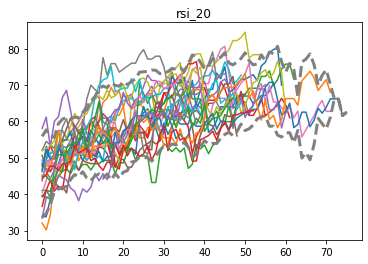

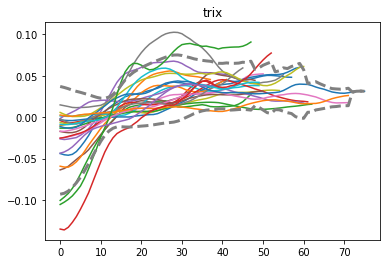

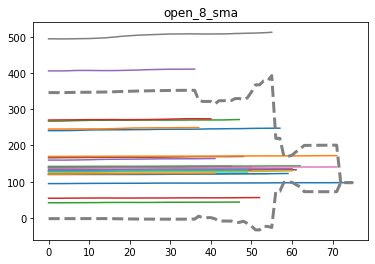

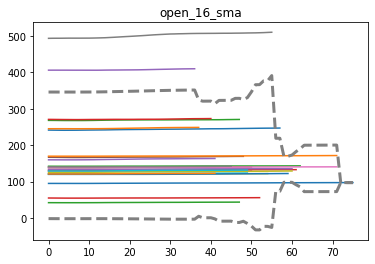

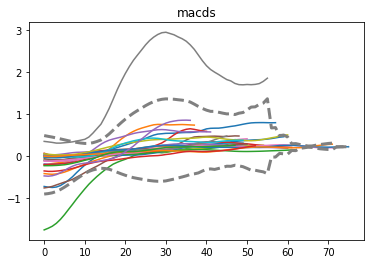

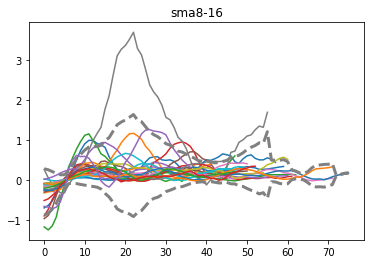

In [172]:
for ind in indikatorer:
    fig = plt.figure()
    plt.title(ind)
    for y in data_oppgang[ind]:
        plt.plot(y)
        
    plt.plot(statestikk_df[ind]['upper'], '--' ,linewidth=3, color='grey')
    plt.plot(statestikk_df[ind]['lower'], '--' ,linewidth=3, color='grey')